In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import chi2
from scipy.stats import ncx2
from scipy.stats import norm as Gauss
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from scipy.interpolate import interp1d

In [2]:
#### 2024_08_10_Wilks_varying_NP_h_0.6732
h_hat = np.array([6.772704e-01, 6.693486e-01, 6.738677e-01, 6.753760e-01, 6.739120e-01, 6.752750e-01, 6.747207e-01, 6.764055e-01, 6.756291e-01, 6.695550e-01, 6.748940e-01, 6.776206e-01, 6.759683e-01, 6.722446e-01, 6.636938e-01, 6.662128e-01, 6.673923e-01, 6.783080e-01, 6.752495e-01, 6.753459e-01, 6.729373e-01, 6.713081e-01, 6.684841e-01, 6.780699e-01, 6.783224e-01, 6.731587e-01, 6.764581e-01, 6.764765e-01, 6.639221e-01, 6.717699e-01, 6.668557e-01, 6.763823e-01, 6.642950e-01, 6.841087e-01, 6.695498e-01, 6.733588e-01, 6.749677e-01, 6.696682e-01, 6.766536e-01, 6.711990e-01, 6.827360e-01, 6.703201e-01, 6.727091e-01, 6.834691e-01, 6.706498e-01, 6.690660e-01, 6.637289e-01, 6.691508e-01, 6.793624e-01, 6.719830e-01, 6.661856e-01, 6.760490e-01, 6.786882e-01, 6.720655e-01, 6.730308e-01, 6.789146e-01, 6.651699e-01, 6.723729e-01, 6.698285e-01, 6.759089e-01, 6.784092e-01, 6.708237e-01, 6.663764e-01, 6.784220e-01, 6.687377e-01, 6.733874e-01, 6.714495e-01, 6.719107e-01, 6.674893e-01, 6.629091e-01, 6.777009e-01, 6.746098e-01, 6.754082e-01, 6.742534e-01, 6.705781e-01, 6.821489e-01, 6.722519e-01, 6.709901e-01, 6.705237e-01, 6.730125e-01, 6.698504e-01, 6.738661e-01, 6.820771e-01, 6.629476e-01, 6.767492e-01, 6.707056e-01, 6.690654e-01, 6.717135e-01, 6.680344e-01, 6.673618e-01, 6.730701e-01, 6.720284e-01, 6.771527e-01, 6.707877e-01, 6.773467e-01, 6.629776e-01, 6.742630e-01, 6.761845e-01, 6.691145e-01, 6.720833e-01,     6.785506e-01, 6.750433e-01, 6.798982e-01, 6.785167e-01, 6.765873e-01, 6.883880e-01, 6.724837e-01, 6.693176e-01, 6.835328e-01, 6.726547e-01, 6.640957e-01, 6.648747e-01, 6.775237e-01, 6.759429e-01, 6.780655e-01, 6.647393e-01, 6.676908e-01, 6.871297e-01, 6.712996e-01, 6.778860e-01, 6.664470e-01, 6.703873e-01, 6.587180e-01, 6.755882e-01, 6.704380e-01, 6.805684e-01, 6.671858e-01, 6.731491e-01, 6.702555e-01, 6.727349e-01, 6.740284e-01, 6.787282e-01, 6.742219e-01, 6.781435e-01, 6.728827e-01, 6.788002e-01, 6.739506e-01, 6.710777e-01, 6.811661e-01, 6.871269e-01, 6.638691e-01, 6.738101e-01, 6.655714e-01, 6.792052e-01, 6.736247e-01, 6.780491e-01, 6.714344e-01, 6.682938e-01, 6.734705e-01, 6.713480e-01, 6.779315e-01, 6.704221e-01, 6.759463e-01, 6.625217e-01, 6.850267e-01, 6.752008e-01, 6.708222e-01, 6.611829e-01, 6.692501e-01, 6.809279e-01, 6.737395e-01, 6.710030e-01, 6.689220e-01, 6.705138e-01, 6.715916e-01, 6.749223e-01, 6.712096e-01, 6.659649e-01, 6.867817e-01, 6.783935e-01, 6.803761e-01, 6.761617e-01, 6.767218e-01, 6.726366e-01, 6.724823e-01, 6.785625e-01, 6.774192e-01, 6.695863e-01, 6.661862e-01, 6.771930e-01, 6.729709e-01, 6.662708e-01, 6.711721e-01, 6.726992e-01, 6.586721e-01, 6.771698e-01, 6.824214e-01, 6.734323e-01, 6.681446e-01, 6.758000e-01, 6.671226e-01, 6.567488e-01, 6.692065e-01, 6.760242e-01, 6.739902e-01, 6.772912e-01, 6.690501e-01, 6.867797e-01, 6.813233e-01, 6.677496e-01])
lnL_hat = -np.array([332.82, 301.34, 282.29, 346.31, 304.59, 296.72, 290.19, 300.83, 299.86, 331.71, 302.42, 330.83, 305.35, 331.23, 307.38, 323.06, 291.69, 281.87, 313.44, 299.34, 318.02, 300.54, 273.31, 322.36, 330.14, 338.23, 306.50, 299.97, 288.32, 300.00, 304.66, 302.74, 299.17, 279.47, 304.01, 299.50, 292.40, 284.93, 308.57, 316.97, 301.59, 321.06, 291.01, 297.15, 304.21, 303.81, 328.00, 309.20, 298.87, 307.04, 300.14, 330.34, 281.40, 283.50, 297.95, 303.01, 285.32, 297.21, 311.71, 312.18, 315.10, 306.02, 324.07, 301.32, 288.12, 309.31, 292.86, 286.48, 306.66, 284.63, 310.69, 295.74, 315.65, 312.85, 305.61, 313.72, 297.67, 287.78, 318.68, 269.84, 304.35, 268.33, 303.70, 291.69, 330.20, 321.87, 307.94, 280.85, 322.09, 297.80, 334.11, 320.13, 298.58, 292.77, 307.86, 295.23, 268.82, 298.18, 316.37, 290.81,    300.35, 295.85, 309.85, 313.51, 304.29, 292.25, 319.06, 336.82, 285.48, 290.93, 285.74, 292.93, 285.57, 304.60, 290.24, 294.07, 309.56, 305.62, 332.70, 290.39, 312.90, 274.12, 327.53, 297.53, 337.26, 296.00, 284.03, 297.91, 301.76, 329.58, 309.94, 292.31, 309.25, 258.89, 315.34, 294.31, 286.39, 285.45, 310.45, 305.78, 300.25, 293.36, 302.96, 280.89, 309.40, 284.81, 289.85, 299.47, 309.35, 353.10, 306.48, 302.55, 290.94, 256.94, 293.37, 298.83, 276.24, 294.90, 270.01, 301.08, 312.25, 307.90, 312.19, 344.40, 294.19, 282.36, 290.18, 306.94, 330.75, 275.40, 315.04, 310.38, 284.19, 271.65, 301.10, 320.59, 315.85, 318.45, 272.82, 328.06, 258.76, 303.10, 316.76, 299.09, 313.32, 289.61, 273.25, 300.42, 286.62, 331.27, 307.00, 320.46, 338.84, 294.81, 318.56, 322.84, 342.11, 293.01, 277.63, 276.84]) 
lnL_tru = -np.array([333.08, 301.57, 282.29, 346.39, 304.61, 296.77, 290.22, 300.98, 299.93, 331.90, 302.46, 331.05, 305.46, 331.25, 308.73, 323.74, 292.14, 282.22, 313.50, 299.39, 318.03, 300.59, 273.63, 322.75, 330.48, 338.23, 306.63, 300.12, 289.55, 300.04, 305.29, 302.92, 300.31, 281.25, 304.18, 299.51, 292.48, 285.11, 308.77, 317.04, 302.95, 321.18, 291.02, 298.61, 304.29, 304.02, 329.26, 309.42, 299.38, 307.07, 300.80, 330.48, 281.83, 283.53, 297.96, 303.47, 286.15, 297.24, 311.91, 312.31, 315.46, 306.10, 324.79, 301.70, 288.44, 309.31, 292.93, 286.52, 307.10, 286.12, 310.95, 295.77, 315.72, 312.88, 305.68, 314.77, 297.71, 287.84, 318.79, 269.85, 304.53, 268.33, 304.80, 293.28, 330.37, 321.94, 308.17, 280.87, 322.52, 298.28, 334.10, 320.16, 298.77, 292.84, 308.07, 296.78, 268.83, 298.33, 316.63, 290.83,    300.77, 295.90, 310.51, 313.93, 304.47, 295.27, 319.07, 337.04, 287.05, 290.95, 286.99, 293.97, 285.84, 304.73, 290.51, 295.18, 310.01, 308.27, 332.73, 290.69, 313.50, 274.23, 330.59, 297.62, 337.38, 296.81, 284.57, 297.92, 301.88, 329.60, 309.95, 292.75, 309.26, 259.26, 315.34, 294.69, 286.40, 285.50, 311.31, 308.62, 301.46, 293.36, 303.87, 281.35, 309.41, 285.20, 289.89, 299.81, 309.35, 353.16, 306.78, 302.66, 291.02, 258.66, 295.29, 298.89, 276.31, 296.94, 270.27, 301.93, 312.25, 307.96, 312.45, 344.54, 294.22, 282.41, 290.24, 307.75, 333.47, 275.78, 315.68, 310.52, 284.37, 271.65, 301.11, 321.01, 316.13, 318.65, 273.47, 328.27, 500.00, 303.66, 316.81, 299.09, 316.20, 289.81, 274.42, 300.42, 286.98, 331.34, 307.55, 324.26, 339.06, 294.96, 318.57, 323.07, 342.37, 295.67, 278.46, 277.32])

# Noncentral
lnL_nc = -np.array([ 335.01, 301.60, 283.39, 347.92, 305.74, 298.13, 291.52, 302.69, 301.47, 332.05, 303.76, 332.94, 307.06, 332.00, 307.42, 323.09, 291.78, 284.39, 314.94, 300.80, 319.04, 301.12, 273.49, 324.94, 332.60, 339.18, 308.32, 301.84, 400.00, 300.64, 304.69, 304.69, 299.19, 284.84, 304.37, 300.64, 293.98, 285.23, 310.59, 317.48, 306.18, 321.48, 291.87, 301.95, 304.66, 304.08, 328.04, 309.46, 301.74, 307.70, 300.16, 332.11, 284.08, 284.23, 298.86, 305.79, 285.32, 298.01, 312.00, 313.96, 317.61, 306.48, 324.09, 303.87, 288.30, 310.28, 293.40, 287.13, 306.76, 284.70, 312.93, 297.07, 317.18, 314.17, 306.14, 317.75, 298.33, 288.27, 319.12, 270.70, 304.67, 269.37, 307.82, 291.78, 332.14, 322.35, 308.19, 281.51, 322.19, 297.90, 335.11, 320.88, 300.56, 293.31, 309.92, 295.31, 270.00, 300.02, 316.59, 291.6,     303.02, 297.30, 313.08, 316.16, 306.25, 299.56, 319.95, 337.10, 290.52, 291.70, 285.75, 292.93, 287.83, 306.37, 292.48, 294.08, 309.66, 312.43, 333.32, 292.71, 312.94, 274.57, 328.12, 299.24, 337.65, 299.56, 284.11, 298.86, 302.16, 330.44, 311.14, 295.06, 310.38, 261.40, 316.20, 296.85, 287.58, 286.01, 314.10, 312.86, 300.26, 294.46, 302.96, 283.67, 310.44, 287.37, 290.45, 299.64, 310.23, 353.67, 308.83, 302.98, 292.53, 257.04, 298.95, 300.33, 276.74, 295.12, 270.21, 304.71, 313.32, 308.45, 312.42, 344.78, 294.88, 283.79, 290.75, 306.99, 337.66, 277.92, 318.19, 312.24, 286.19, 272.50, 301.93, 323.21, 318.12, 318.74, 272.84, 330.15, 259.68, 303.14, 317.30, 300.06, 313.83, 291.66, 277.50, 301.40, 286.77, 332.82, 307.07, 321.41, 339.11, 296.67, 319.66, 324.92, 342.33, 299.79, 281.23, 276.93])

# Asimov data set 2024_04_03_Wilks_varying_NP_asimov
hs_asimov   =   np.array([ 0.660,0.665,0.670,0.6732,0.675,0.680,0.685,0.690]) #0.66, 0.665, 0.67, 0.6732, 0.675, 0.68, 0.685, 0.69])
chi2_asimov =2*np.array([   2.54, 0.98, 0.16,  0.01, 0.05, 0.64, 1.92, 3.88]) #1.69,  0.65, 0.10,   0.00,  0.03, 0.44,  1.30, 2.63]))

# Compute likelihood ratio
LR = -2*(lnL_tru - lnL_hat)
LR_NC = -2*(lnL_nc - lnL_hat)
print(len(lnL_nc))

200


In [3]:
# LR alternative settings
bin_max_alt = 12

# LR settings
bin_width = 0.5
bin_max = 5
bins = np.arange(0, bin_max, bin_width)
bins_fine = np.arange(0, bin_max_alt, bin_width/10.)
N_LR = len(LR)
nbins = len(bins)
norm = bin_width*N_LR

bins_alt = np.arange(0, bin_max_alt, bin_width)
bins_fine_alt = np.arange(0, bin_max_alt, bin_width/10.)

# h settings
h_true = 0.6732
h_alt = 0.665
h_lim = 0.02
h_bin_width = h_lim/10.
h_bins = np.arange(h_true-h_lim, h_true+h_lim, h_bin_width)
h_bins_fine = np.arange(h_true-h_lim, h_true+h_lim, h_bin_width/10.)
norm_h = h_bin_width*N_LR

In [4]:
# Set fonts
plt.rc('font',**{'family':'Helvetica','size':16})
plt.rc('text', usetex=True)
font = {'family':'Helvetica',
        'color' : 'black',
        'size'  :  16}
plt.rcParams["font.family"] = 'Helvetica' #"Times New Roman"
plt.rc('font', family='Times New Roman')

In [5]:
# Define a parabola
def parab(x, a,b,c):
    return a + b * (x-c)**2.

MLE:  0.6733781107049385
1 sigma:  0.005965538747457366


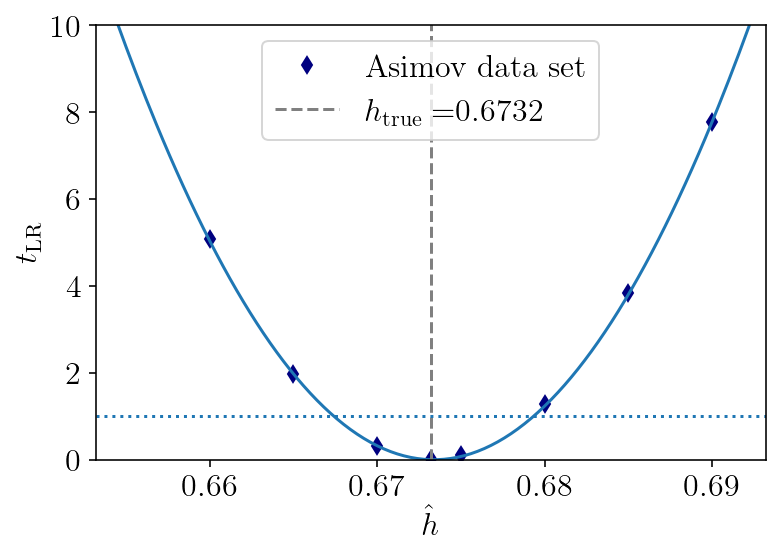

In [6]:
#### Compute Asimov error

#Fit parabola
[a,b,c], pcov = curve_fit(parab, hs_asimov, chi2_asimov, p0=[0.72, 1185714, 0.67], maxfev=30000)
fit_x = h_bins_fine
fit_y = b * (fit_x-c)**2.
parabola_min = a

# Find intersection of parabola with \Delta\chi^2 = 1
def parabola(x):
    return b * (x-c)**2. -1
print("MLE: ", c)
zeros = fsolve(parabola, x0=[0.60,0.70])
sigma = (zeros[1]-zeros[0])/2.
print("1 sigma: ", sigma)
sigma_asimov = sigma

# Plot
plt.plot(hs_asimov, chi2_asimov, marker="d", ls="", color="navy", label="Asimov data set")
plt.plot(fit_x, fit_y, color='tab:blue', ls='-')
plt.vlines(h_true, 0, 20, color="grey", ls="--", label=r"$h_\mathrm{true} = $"+str(h_true))
plt.axhline(1, color="tab:blue", ls=":")
plt.ylabel(r"$t_\mathrm{LR}$")
plt.xlabel(r"$\hat h$")
plt.ylim([0,10])
plt.xlim([h_true-h_lim, h_true+h_lim])
plt.legend()
plt.savefig("PL_asimov_h.pdf", format="PDF", bbox_inches='tight')
plt.show()

In [7]:
# Adopt x bins
h_lim = 4*sigma_asimov
h_bin_width = h_lim/10.
h_bins = np.arange(h_true-h_lim, h_true+h_lim, h_bin_width)
h_bins_fine = np.arange(h_true-h_lim, h_true+h_lim, h_bin_width/10.)
norm_h = h_bin_width*N_LR

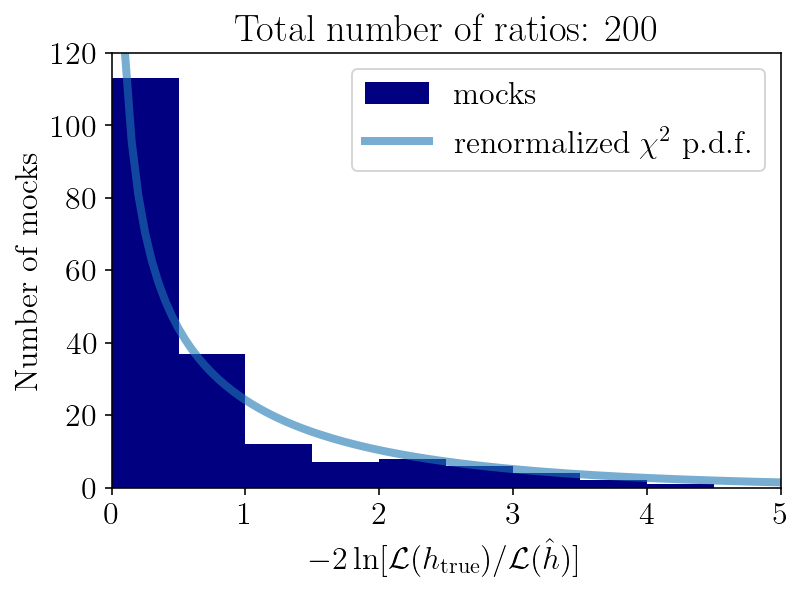

In [8]:
# Plot LR histogram
plt.hist(LR, bins=bins, color="navy", label="mocks")
plt.plot(bins_fine, norm*chi2.pdf(bins_fine, df=1), color="tab:blue", lw=4, alpha=0.6, label=r'renormalized $\chi^2$ p.d.f.')
plt.xlim([0,bin_max])
plt.ylim([0,120])
plt.xlabel(r"$-2\ln[{\mathcal{L}(h_\mathrm{true})}/{\mathcal{L}(\hat{h})}]$")
plt.ylabel("Number of mocks")
plt.title("Total number of ratios: "+str(N_LR))
plt.legend()
plt.show()

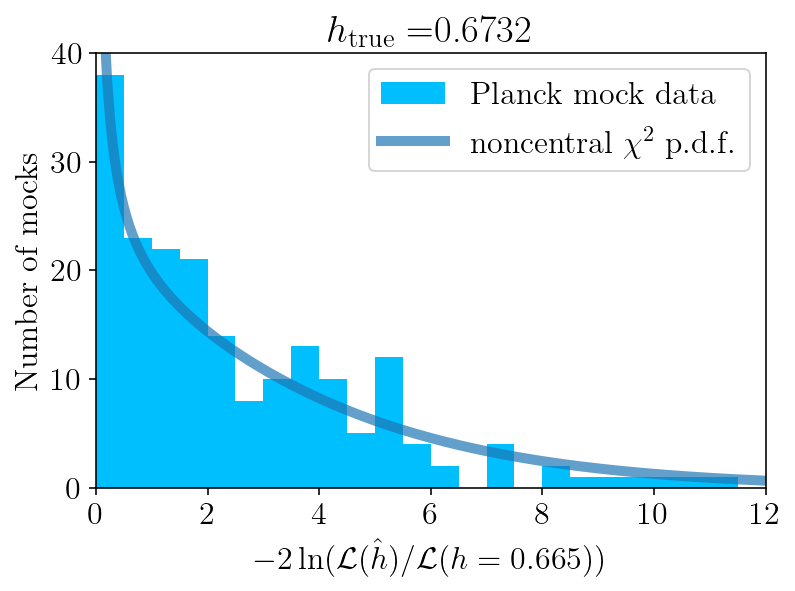

In [9]:
# Plot noncentral histogram
plt.hist(LR_NC, bins=bins_alt, color="deepskyblue", label="Planck mock data")
plt.plot(bins_fine_alt, norm*ncx2.pdf(bins_fine_alt, df=1, nc=(h_true-h_alt)**2/sigma_asimov**2), color="tab:blue", lw=5, alpha=0.7, label=r'noncentral $\chi^2$ p.d.f.')
plt.xlim([0,bin_max_alt])
plt.ylim([0,40])
plt.xlabel(r"$-2\ln(\mathcal{L}(\hat{h})/\mathcal{L}(h="+str(h_alt)+"))$")
plt.ylabel("Number of mocks")
plt.legend()
plt.title(r"$h_\mathrm{true}= $"+str(h_true))
plt.show()

/Users/lherold/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


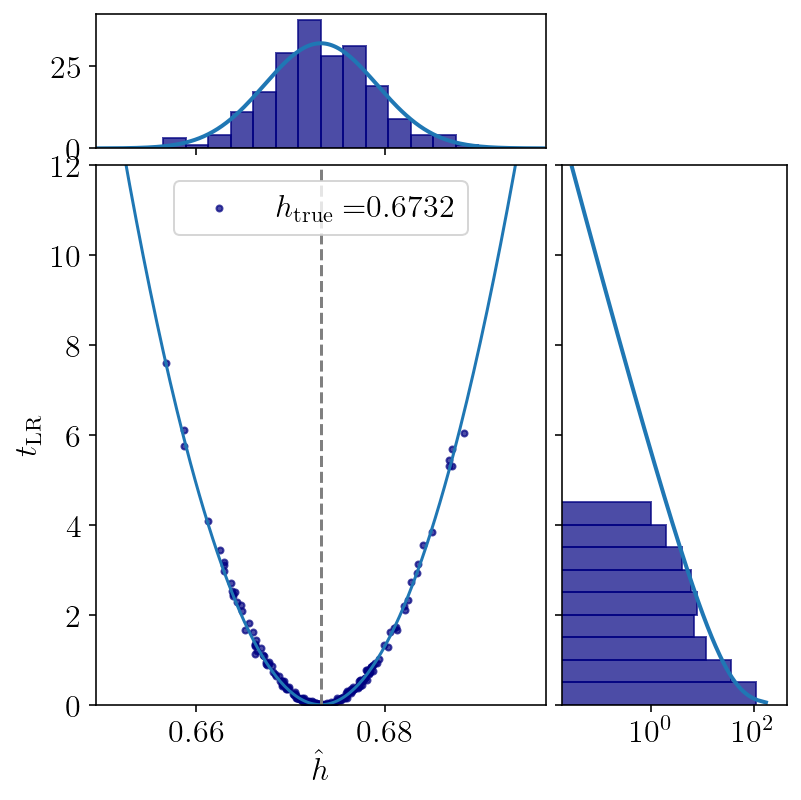

In [10]:
# Initialise plot
fig = plt.figure(figsize=(6, 6))
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 2), height_ratios=(1, 4), left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.05, hspace=0.05)
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histy.tick_params(axis="y", labelleft=False)

# Center plot
ax.scatter(h_hat, LR, color="navy", marker=".", label=r"$h_\mathrm{true} = $"+str(h_true), alpha=0.7)
ax.plot(h_bins_fine, (h_bins_fine-h_true)**2/sigma_asimov**2, color='tab:blue', ls='-')
ax.vlines(h_true, 0, bin_max_alt, ls="--", color="grey")
ax.set_xlim([h_true-h_lim, h_true+h_lim])
ax.set_ylim([0,bin_max_alt])
ax.set_xlabel(r"$\hat h$")
ax.set_ylabel(r"$t_\mathrm{LR}$")
ax.legend()

# Hist x
ax_histx.hist(h_hat, bins=h_bins, color="navy", alpha=0.7, edgecolor='navy')
ax_histx.plot(h_bins_fine, norm_h*Gauss.pdf(h_bins_fine, loc=h_true, scale=sigma_asimov), color='tab:blue', lw=2)

# Hist y
ax_histy.hist(LR, bins=bins, orientation='horizontal', color="navy", alpha=0.7, edgecolor='navy')
ax_histy.plot(norm*chi2.pdf(bins_fine, df=1), bins_fine, color='tab:blue', lw=2)
ax_histy.set_xscale("log")
ax_histy.set_xlim([0,450])

plt.show()

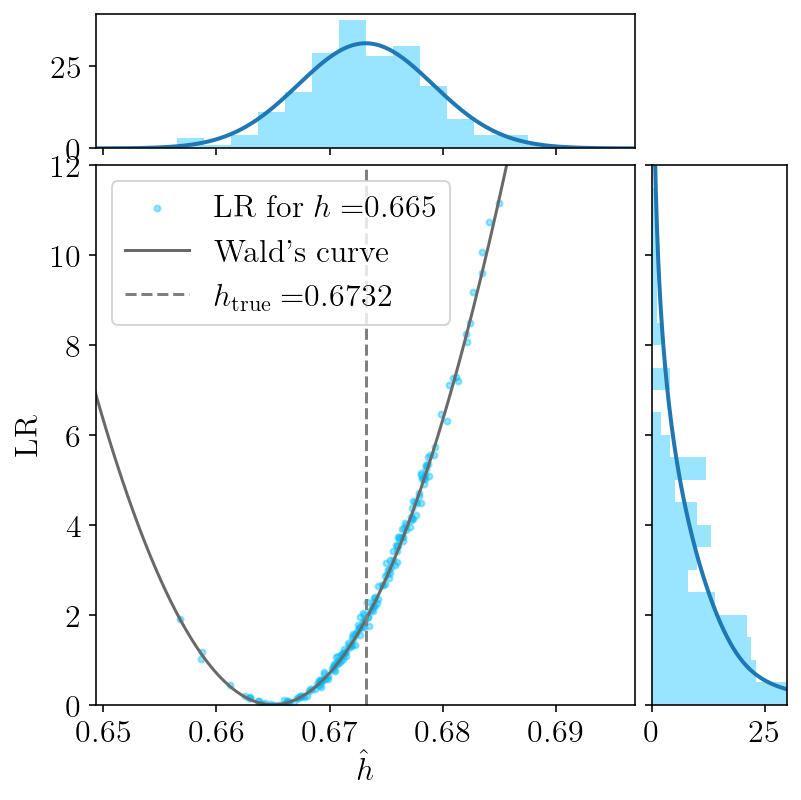

In [11]:
# Initialise plot
fig = plt.figure(figsize=(6, 6))
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4), left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.05, hspace=0.05)
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histy.tick_params(axis="y", labelleft=False)

# Center plot
ax.scatter(h_hat, LR_NC, color="deepskyblue", alpha=0.4, marker=".", label=r"LR for $h = $"+str(h_alt))
ax.plot(h_bins_fine-(h_true-h_alt), (h_bins_fine-h_true)**2/sigma_asimov**2, color='dimgrey', ls='-', label="Wald's curve")
ax.vlines(h_true, 0, bin_max_alt, ls="--", color="grey", label=r"$h_\mathrm{true} = $"+str(h_true))
ax.set_xlim([h_true-h_lim, h_true+h_lim])
ax.set_ylim([0,bin_max_alt])
ax.set_xlabel(r"$\hat h$")
ax.set_ylabel("LR")
ax.legend()

# Hist x
ax_histx.hist(h_hat, bins=h_bins, color="deepskyblue", alpha=0.4)
ax_histx.plot(h_bins_fine, norm_h*Gauss.pdf(h_bins_fine, loc=h_true, scale=sigma_asimov), color='tab:blue', lw=2, label=r'$\chi^2$ p.d.f.')

# Hist y
ax_histy.hist(LR_NC, bins=bins_alt, orientation='horizontal', color="deepskyblue", alpha=0.4)
ax_histy.plot(norm*ncx2.pdf(bins_fine_alt, df=1, nc=(h_true-h_alt)**2/sigma_asimov**2), bins_fine_alt, color='tab:blue', lw=2)
ax_histy.set_xlim([0,30])
plt.show()

/Users/lherold/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


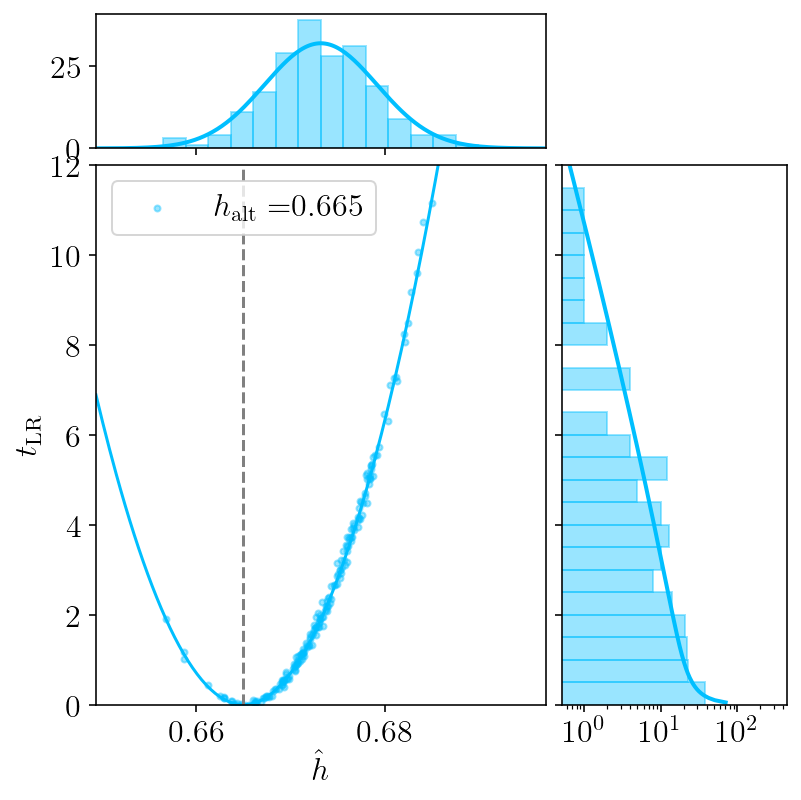

In [12]:
# Initialise plot
fig = plt.figure(figsize=(6, 6))
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 2), height_ratios=(1, 4), left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.05, hspace=0.05)
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histy.tick_params(axis="y", labelleft=False)

# Center plot
ax.scatter(h_hat, LR_NC, color="deepskyblue", alpha=0.4, marker=".", label=r"$h_\mathrm{alt} = $"+str(h_alt))
ax.plot(h_bins_fine, (h_bins_fine-h_alt)**2/sigma_asimov**2, color='deepskyblue', ls='-')
ax.vlines(h_alt, 0, bin_max_alt, ls="--", color="grey")
ax.set_xlim([h_true-h_lim, h_true+h_lim])
ax.set_ylim([0,bin_max_alt])
ax.set_xlabel(r"$\hat h$")
ax.set_ylabel(r"$t_\mathrm{LR}$")
ax.legend()

# Hist x
ax_histx.hist(h_hat, bins=h_bins, color="deepskyblue", alpha=0.4, edgecolor='deepskyblue')
ax_histx.plot(h_bins_fine, norm_h*Gauss.pdf(h_bins_fine, loc=h_true, scale=sigma_asimov), color='deepskyblue', lw=2, label=r'$\chi^2$ p.d.f.')

# Hist y
ax_histy.hist(LR_NC, bins=bins_alt, orientation='horizontal', color="deepskyblue", alpha=0.4, edgecolor='deepskyblue')
ax_histy.plot(norm*ncx2.pdf(bins_fine_alt, df=1, nc=(h_true-h_alt)**2/sigma_asimov**2), bins_fine_alt, color='deepskyblue', lw=2)
ax_histy.set_xscale("log")
ax_histy.set_xlim([0,450])

plt.show()

In [13]:
# Adapt h bin settings
x_lim = 4*sigma_asimov

/Users/lherold/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


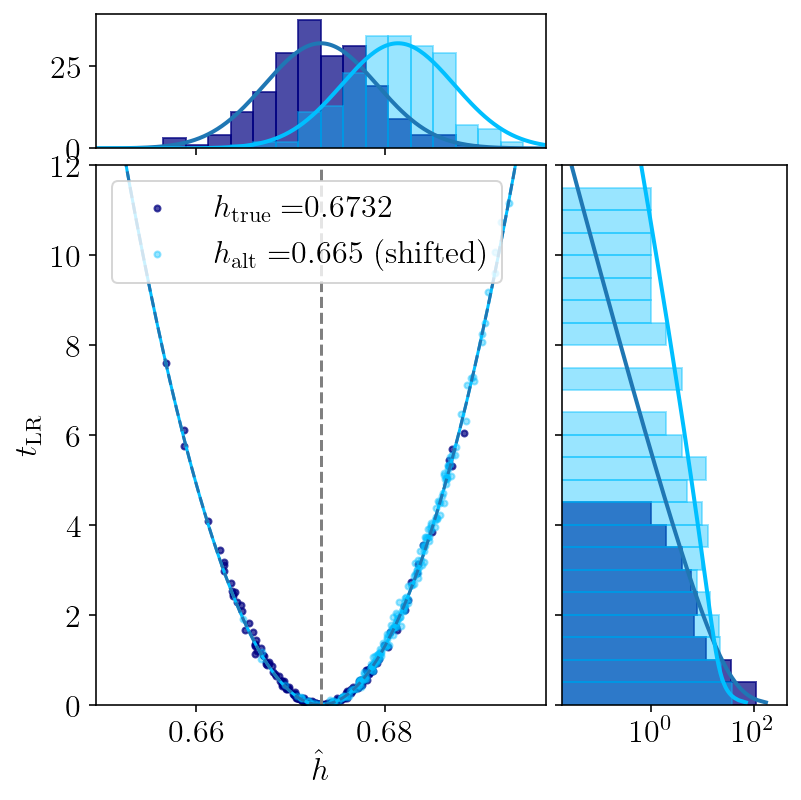

In [14]:
# Initialise plot
fig = plt.figure(figsize=(6, 6))
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 2), height_ratios=(1, 4), left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.05, hspace=0.05)
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histy.tick_params(axis="y", labelleft=False)

# Center plot
ax.scatter(h_hat, LR, color="navy", marker=".", label=r"$h_\mathrm{true} = $"+str(h_true), alpha=0.7)
ax.scatter(h_hat+(h_true-h_alt), LR_NC, color="deepskyblue", alpha=0.4, marker=".", label=r"$h_\mathrm{alt} = $"+str(h_alt)+" (shifted)")
ax.plot(h_bins_fine, (h_bins_fine-h_true)**2/sigma_asimov**2, color='deepskyblue', ls='-')
ax.plot(h_bins_fine, (h_bins_fine-h_true)**2/sigma_asimov**2, color='tab:blue', ls='--')
ax.vlines(h_true, 0, bin_max_alt, ls="--", color="grey")
ax.set_xlim([h_true-h_lim, h_true+h_lim])
ax.set_ylim([0,bin_max_alt])
ax.set_xlabel(r"$\hat h$")
ax.set_ylabel(r"$t_\mathrm{LR}$")
ax.legend()

# Hist x
ax_histx.hist(h_hat, bins=h_bins, color="navy", alpha=0.7, edgecolor='navy')
ax_histx.plot(h_bins_fine, norm_h*Gauss.pdf(h_bins_fine, loc=h_true, scale=sigma_asimov), color='tab:blue', lw=2)
ax_histx.hist(h_hat+(h_true-h_alt), bins=h_bins, color="deepskyblue", alpha=0.4, edgecolor='deepskyblue')
ax_histx.plot(h_bins_fine, norm_h*Gauss.pdf(h_bins_fine, loc=2*h_true-h_alt, scale=sigma_asimov), color='deepskyblue', lw=2, label=r'$\chi^2$ p.d.f.')

# Hist y
ax_histy.hist(LR, bins=bins, orientation='horizontal', color="navy", alpha=0.7, edgecolor='navy')
ax_histy.plot(norm*chi2.pdf(bins_fine, df=1), bins_fine, color='tab:blue', lw=2)
ax_histy.hist(LR_NC, bins=bins_alt, orientation='horizontal', color="deepskyblue", alpha=0.4, edgecolor='deepskyblue')
ax_histy.plot(norm*ncx2.pdf(bins_fine_alt, df=1, nc=(h_true-h_alt)**2/sigma_asimov**2), bins_fine_alt, color='deepskyblue', lw=2)
ax_histy.set_xscale("log")
ax_histy.set_xlim([0,450])

plt.savefig("LR_hist_varying_NP_h.pdf", bbox_inches='tight')
plt.show()

In [15]:
# Find \Delta\chi^2 for which 68% of mocks are below
LR_cutoff = 0.77
print(100*np.count_nonzero(LR<LR_cutoff)/len(LR), "% of mocks below: ", LR_cutoff)

68.0 % of mocks below:  0.77


In [16]:
# Find \Delta\chi^2 for which 95.45% of mocks are below
LR_cutoff = 4
print(100*np.count_nonzero(LR<LR_cutoff)/len(LR), "% of mocks below: ", LR_cutoff)

95.0 % of mocks below:  4


In [17]:
# Compare sigma_asimov and sigma_mocks:
print("sigma_asimov: ", sigma_asimov)
print("sigma_mocks: ", np.std(h_hat))

sigma_asimov:  0.005965538747457366
sigma_mocks:  0.005593177231604232
